In [3]:
from scipy import io
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import csv


In [17]:
import numpy as np
# goci maks
# land_sea_mask_path = "/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI.npy"  # Replace with your actual file path
# -1 land 0 ocean
# land_sea_mask_path ="/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI_modified_1_999.npy"
#  999 land 1 ocean
# ust 21 mask
land_sea_mask_path ="/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask_flipped.npy"
#  999 land 1 ocean
land_sea_mask = np.load(land_sea_mask_path)
print(f"Land-sea mask loaded with shape: {land_sea_mask.shape}")
print(np.unique(land_sea_mask))


Land-sea mask loaded with shape: (8000, 10500)
[  1 999]


(-0.5, 10499.5, 7999.5, -0.5)

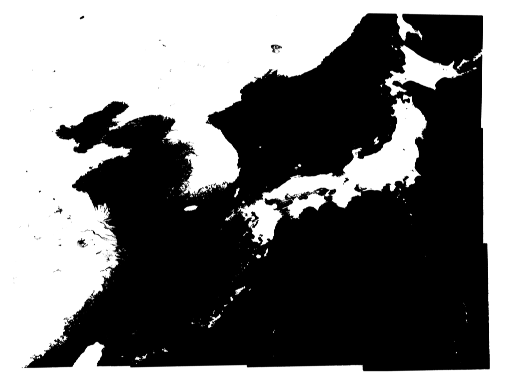

In [18]:
plt.imshow(land_sea_mask,cmap='grey')
plt.axis(False)


In [19]:

import numpy as np
# goci maks
# land_sea_mask_path = "/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI.npy"  # Replace with your actual file path
land_sea_mask_path ="/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI_modified_1_999_flipped.npy"
# ust 21 mask
# land_sea_mask_path ="/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.npy"
land_sea_mask = np.load(land_sea_mask_path)
print(f"Land-sea mask loaded with shape: {land_sea_mask.shape}")
print(np.unique(land_sea_mask))


Land-sea mask loaded with shape: (5685, 5567)
[  1. 999.]


(-0.5, 5566.5, 5684.5, -0.5)

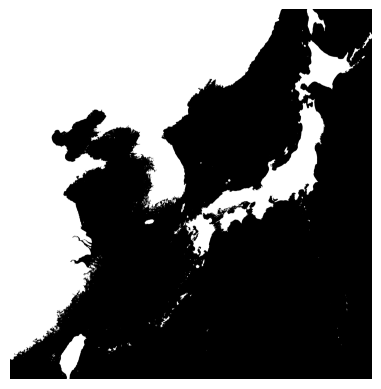

In [20]:
plt.imshow(land_sea_mask,cmap='grey')
plt.axis(False)
# -1 육지 0 해양
# 1 육지 999 해양

In [ ]:
# import numpy as np

# # 변환 대상 파일 경로들
# paths = [
#     '/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI_modified_1_999.npy',
#     '/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.npy'
# ]

# for path in paths:
#     # 1. 로드
#     mask = np.load(path)

#     # 2. 값 뒤집기: 1 ↔ 999
#     flipped = np.where(mask == 1, 999, np.where(mask == 999, 1, mask))

#     # 3. 저장 (덮어쓰기하거나 새로 저장)
#     save_path = path.replace('.npy', '_flipped.npy')  # 원본 보존 시
#     # save_path = path  # 원본 덮어쓰기 원하면 이걸 사용
#     np.save(save_path, flipped)

#     print(f"[Saved] flipped mask → {save_path}")


[Saved] flipped mask → /home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI_modified_1_999_flipped.npy
[Saved] flipped mask → /home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask_flipped.npy


In [10]:
image_height, image_width = mask.shape[0], mask.shape[1]

num_patches_x = image_width // 256
num_patches_y = image_height // 256

# 패치들을 저장할 NumPy 배열을 초기화합니다. 패치의 개수와 크기에 맞춰 배열의 크기를 설정합니다.
# 이미지가 컬러라면 3차원, 흑백이라면 2차원일 것입니다. 여기서는 컬러 이미지를 가정합니다.
patches = np.empty((num_patches_y * num_patches_x, 256, 256), dtype=mask.dtype)

# 각 패치를 추출하여 NumPy 배열에 추가합니다.
for i in range(num_patches_y):
    for j in range(num_patches_x):
        # 패치의 시작점을 계산합니다.
        start_x = j * 256
        start_y = i * 256
        # NumPy 배열의 인덱스를 계산합니다.
        index = i * num_patches_x + j
        # 이미지에서 해당 패치를 추출하고 배열에 저장합니다.
        patches[index] = mask[start_y:start_y + 256, start_x:start_x + 256]

# NumPy 배열에 담긴 패치들의 정보를 확인합니다.
patches.shape


(1271, 256, 256)

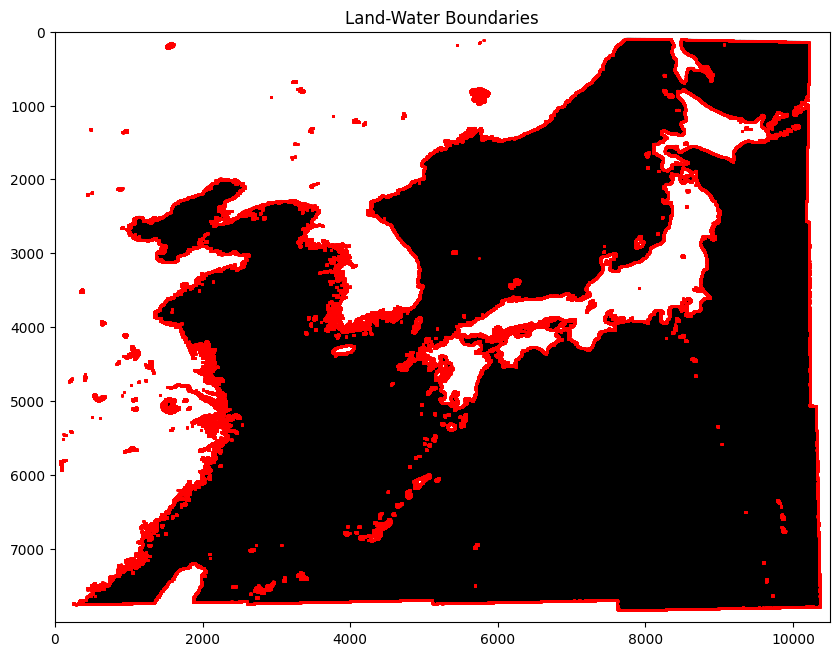

[[  91 7751]
 [  91 7752]
 [  91 7753]
 ...
 [7830 7637]
 [7830 7638]
 [7830 7639]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Assuming `mask` is your 2D numpy array with 0s and 1s.
# mask = mat_file['Land']  # Already loaded in your code

# Use the Canny edge detector to find the boundaries
edges = cv2.Canny(mask.astype(np.uint8), 100, 200)

# Get the coordinates of the boundary points
boundary_coords = np.column_stack(np.where(edges > 0))

# Display the mask and boundaries
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.scatter(boundary_coords[:, 1], boundary_coords[:, 0], s=1, c='red')
plt.title('Land-Water Boundaries')
plt.show()

# Print the boundary coordinates
print(boundary_coords)


In [14]:
# import numpy as np
# import csv

# # Assuming 'mask' is your 2D numpy array with 0s and 1s.
# # For example, mask = mat_file['Land']

# def find_boundary_coordinates(mask):
#     boundary_coords = []

#     # Traverse through the entire mask array to detect the transition points
#     for i in range(1, mask.shape[0] - 1):
#         for j in range(1, mask.shape[1] - 1):
#             # Check if the current pixel is different from its right neighbor or bottom neighbor
#             if mask[i, j] != mask[i, j + 1] or mask[i, j] != mask[i + 1, j]:
#                 boundary_coords.append((i, j))  # (y, x) coordinate

#     return boundary_coords

# # Get the boundary coordinates
# boundary_coordinates = find_boundary_coordinates(mask)

# # Display the total number of boundary coordinates found
# print(f"Total boundary coordinates found: {len(boundary_coordinates)}")

# # Print a few boundary coordinates for verification
# print("Sample boundary coordinates:", boundary_coordinates[:10])

# # Optionally, you can split the coordinates into separate lists of x and y values
# y_coords, x_coords = zip(*boundary_coordinates)

# # Display the lists of x and y coordinates
# print("X Coordinates:", list(x_coords)[:10])
# print("Y Coordinates:", list(y_coords)[:10])

# # Save the boundary coordinates to a CSV file
# output_file = 'boundary_coordinates.csv'

# with open(output_file, 'w', newline='') as csvfile:
#     csvwriter = csv.writer(csvfile)
#     # Write the header
#     csvwriter.writerow(['Y Coordinate', 'X Coordinate'])
#     # Write the coordinates
#     csvwriter.writerows(boundary_coordinates)

# print(f"Boundary coordinates saved to {output_file}")


<Figure size 96000x64000 with 0 Axes>

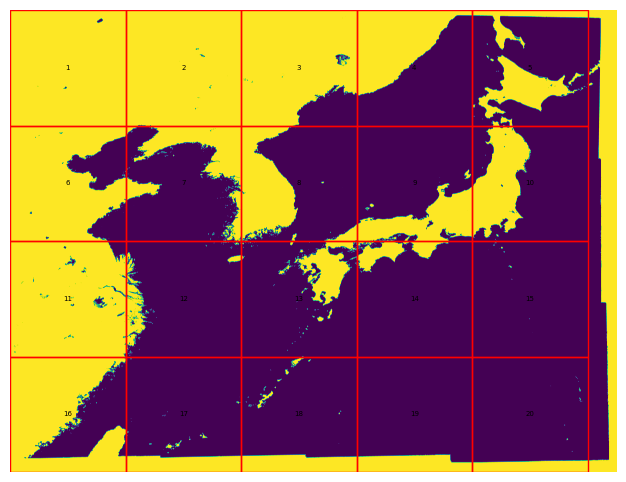

In [15]:
import matplotlib.patches as patches

height, width = mask.shape[:2]
plt.figure(figsize=(120,80), dpi=800)
# 플롯을 생성합니다.
fig, ax = plt.subplots(figsize=(8, 6))
# 이미지를 플롯에 렌더링합니다.
ax.imshow(mask)

# 패치 인덱스를 표시합니다.
for i in range(height // 2000):
    for j in range(width // 2000):
        # 각 패치의 중심 좌표를 계산합니다.
        center_x, center_y = j * 2000 + 1000, i * 2000 + 1000
        # 인덱스를 계산합니다 (1부터 시작).
        index = i * (width // 2000) + j + 1
#         print(index)
        # 인덱스 텍스트를 이미지에 추가합니다.
        ax.text(center_x, center_y, str(index), color='black', ha='center', va='center', fontsize=5)
        # 패치의 테두리를 그립니다.
        point =2000
        rect = patches.Rectangle((j*point, i*point), point, point, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

# 축을 숨깁니다.
plt.axis('off')
plt.show()


In [16]:
import numpy as np
import csv
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# Assuming 'mask' is your 2D numpy array with 0s and 1s.
# For example, mask = mat_file['Land']

def find_boundary_coordinates(mask, boxes, exclude_box_indices=None):
    boundary_coords = []

    # Ensure exclude_box_indices is a set for faster lookup
    if exclude_box_indices is None:
        exclude_box_indices = set()
    else:
        exclude_box_indices = set(exclude_box_indices)

    # Traverse through the entire mask array to detect the transition points
    for i in range(1, mask.shape[0] - 1):
        for j in range(1, mask.shape[1] - 1):
            # Check if the current pixel is different from its right neighbor or bottom neighbor
            if mask[i, j] != mask[i, j + 1] or mask[i, j] != mask[i + 1, j]:
                # Check if the coordinate is inside any of the boxes, skipping the excluded ones
                for idx, box in enumerate(boxes):
                    if idx in exclude_box_indices:
                        continue  # Skip the boxes specified in exclude_box_indices

                    if box['x'] <= j <= box['x'] + box['size'] and box['y'] <= i <= box['y'] + box['size']:
                        boundary_coords.append((i, j))  # (y, x) coordinate
                        break  # If it's in one box, no need to check further

    return boundary_coords

# Define the red boxes
def create_boxes(height, width, box_size=1915):
    boxes = []
    for i in range(height // box_size):
        for j in range(width // box_size):
            box = {
                'x': j * box_size,
                'y': i * box_size,
                'size': box_size
            }
            boxes.append(box)
    return boxes

# Function to process the mask with different box sizes and exclusion indices
def process_mask_with_boxes(mask, box_sizes_with_exclusions):
    all_boundary_coordinates = []

    for box_size, exclude_indices in box_sizes_with_exclusions.items():
        print(f"Processing with box size {box_size} excluding indices {exclude_indices}")

        # Create the boxes based on the current box size
        height, width = mask.shape[:2]
        boxes = create_boxes(height, width, box_size=box_size)

        # Plot the boxes on the mask
        plt.figure(figsize=(120, 80), dpi=800)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.imshow(mask)

        # Draw the boxes and their indices
        for idx, box in enumerate(boxes):
            rect = patches.Rectangle((box['x'], box['y']), box['size'], box['size'], linewidth=1, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            # Draw the index number inside the box
            ax.text(box['x'] + box['size'] / 2, box['y'] + box['size'] / 2, str(idx + 1),
                    color='black', ha='center', va='center', fontsize=12)

        plt.axis('off')
        plt.show()

        # Get the boundary coordinates within the red boxes, excluding the specified boxes
        boundary_coordinates = find_boundary_coordinates(mask, boxes, exclude_box_indices=exclude_indices)

        # Add the found boundary coordinates to the overall list
        all_boundary_coordinates.extend(boundary_coordinates)

    # Display the total number of boundary coordinates found
    print(f"Total boundary coordinates found across all box sizes: {len(all_boundary_coordinates)}")

    # Print a few boundary coordinates for verification
    print("Sample boundary coordinates:", all_boundary_coordinates[:10])

    # Save all the boundary coordinates to a single CSV file
    output_file = 'all_boundary_coordinates.csv'

    with open(output_file, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        # Write the header
        csvwriter.writerow(['Y Coordinate', 'X Coordinate'])
        # Write the coordinates
        csvwriter.writerows(all_boundary_coordinates)

    print(f"All boundary coordinates saved to {output_file}")

# Dictionary specifying box sizes and the indices to exclude for each
# box_sizes_with_exclusions = {
#     1900: [0, 1],
#     1650: [3],
#     1570: [16],
#     1500: [3],
#     1450: [16],
#     1350: [4],
#     1300: [4, 5, 16],
#     1250: [1, 2, 3, 4, 5, 6, 16],
#     1200: [6, 16],
#     1150: [16],
#     1100: [1, 2, 3, 4, 5, 6, 9, 16],
#     990: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16]
# }
box_sizes_with_exclusions = {
    500 : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,27,29,30,
 31,32,33,34,41,42,43,44,45,46,47,48,49,50,51,52,63,64,65,66,67,69,70,71,72,83,84,85,86,
 104,105,106,125,126,127,128,146,147,148,149,158,167,169,170,188,189,190,191,192,209,210,
 211,212,213,230,231,232,233,234,235,251,252,253,254,255,272,273,274,275,293,294,295,296,
 297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,
 317,318,319,320,321,322,333,334,335,336]
}

# Process the mask with different box sizes and exclusion indices, and save all results in one CSV file
process_mask_with_boxes(mask, box_sizes_with_exclusions)


Processing with box size 500 excluding indices [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 27, 29, 30, 31, 32, 33, 34, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 63, 64, 65, 66, 67, 69, 70, 71, 72, 83, 84, 85, 86, 104, 105, 106, 125, 126, 127, 128, 146, 147, 148, 149, 158, 167, 169, 170, 188, 189, 190, 191, 192, 209, 210, 211, 212, 213, 230, 231, 232, 233, 234, 235, 251, 252, 253, 254, 255, 272, 273, 274, 275, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 317, 318, 319, 320, 321, 322, 333, 334, 335, 336]


<Figure size 96000x64000 with 0 Axes>

KeyboardInterrupt: 

<Figure size 96000x64000 with 0 Axes>

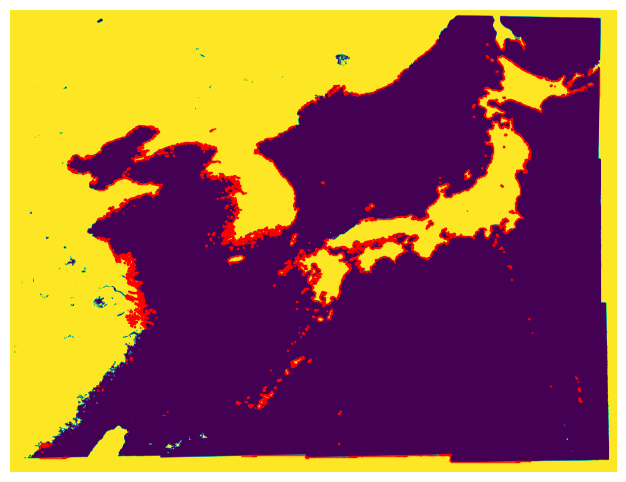

In [ ]:
# import numpy as np
# import csv
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# # Function to plot boundary boxes
# def plot_boundary_boxes(mask, boundary_coords, box_size=1):
#     height, width = mask.shape[:2]
#     plt.figure(figsize=(120, 80), dpi=800)
#     # Create a plot
#     fig, ax = plt.subplots(figsize=(8, 6))
#     # Render the image in the plot
#     ax.imshow(mask)

#     # Draw a red box for each boundary coordinate
#     for y, x in boundary_coords:
#         # Calculate the top-left corner of the box
#         top_left_x = max(0, x - box_size // 2)
#         top_left_y = max(0, y - box_size // 2)

#         # Ensure the box doesn't go out of image bounds
#         if top_left_x + box_size > width:
#             top_left_x = width - box_size
#         if top_left_y + box_size > height:
#             top_left_y = height - box_size

#         # Draw the box
#         rect = patches.Rectangle((top_left_x, top_left_y), box_size, box_size, linewidth=1, edgecolor='red', facecolor='none')
#         ax.add_patch(rect)

#     # Hide the axes
#     plt.axis('off')
#     plt.show()

# # Function to load boundary coordinates from a CSV file
# def load_boundary_coordinates_from_csv(filename):
#     boundary_coords = []
#     with open(filename, 'r') as csvfile:
#         csvreader = csv.reader(csvfile)
#         next(csvreader)  # Skip the header
#         for row in csvreader:
#             y, x = int(row[0]), int(row[1])
#             boundary_coords.append((y, x))
#     return boundary_coords

# # Load boundary coordinates from the CSV file
# boundary_coordinates = load_boundary_coordinates_from_csv('all_boundary_coordinates.csv')

# # Plot the boundary boxes on the mask
# plot_boundary_boxes(mask, boundary_coordinates)


### 전체에 대해서 좌표 얻기 

Processing with box size 500 excluding indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 27, 29, 30, 31, 32, 33, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 62, 63, 64, 65, 66, 69, 70, 71, 83, 84, 85, 104, 105, 106, 125, 126, 127, 128, 146, 147, 148, 167, 168, 169, 170, 188, 189, 190, 191, 192, 209, 210, 211, 212, 213, 230, 231, 232, 233, 251, 252, 253, 254, 272, 273, 274, 293, 294, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336]


<Figure size 96000x64000 with 0 Axes>

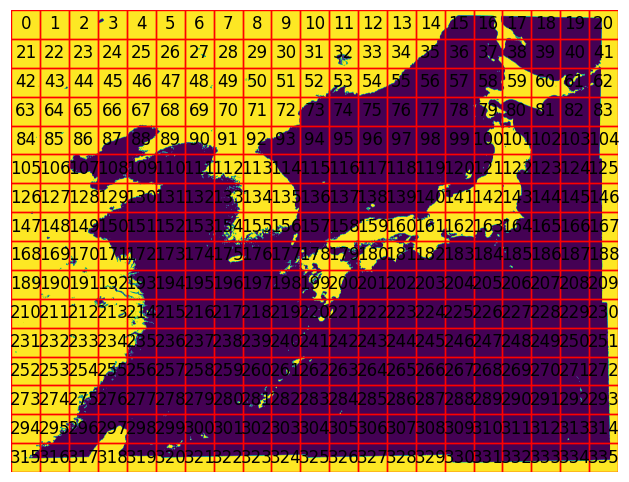

Total boundary coordinates found across all box sizes: 197884
Total excluded boundary coordinates: 61897
Sample boundary coordinates: [(501, 7413), (501, 8399), (501, 8571), (501, 8572), (501, 8646), (501, 8647), (501, 8854), (502, 7410), (502, 7411), (502, 7412)]
Sample excluded coordinates: [(91, 7750), (91, 7751), (91, 7752), (91, 7753), (91, 7754), (91, 7755), (91, 7756), (91, 7757), (91, 7758), (91, 7759)]
Included boundary coordinates saved to all_boundary_coordinates_included.csv
Excluded boundary coordinates saved to all_boundary_coordinates_excluded.csv


<Figure size 96000x64000 with 0 Axes>

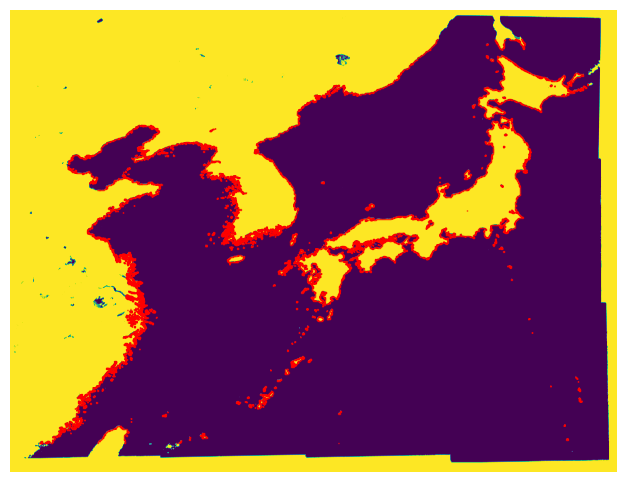

<Figure size 96000x64000 with 0 Axes>

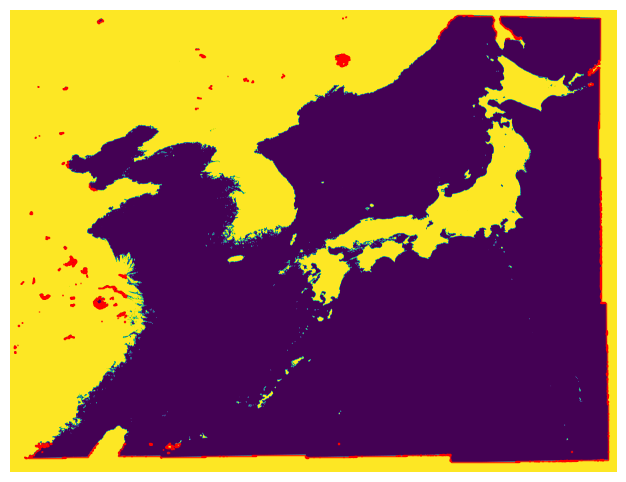

In [ ]:
import numpy as np
import csv
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# Assuming 'mask' is your 2D numpy array with 0s and 1s.
# For example, mask = mat_file['Land']

def find_boundary_coordinates(mask, boxes, exclude_box_indices=None):
    boundary_coords = []
    excluded_coords = []

    # Ensure exclude_box_indices is a set for faster lookup
    if exclude_box_indices is None:
        exclude_box_indices = set()
    else:
        exclude_box_indices = set(exclude_box_indices)

    # Traverse through the entire mask array to detect the transition points
    for i in range(1, mask.shape[0] - 1):
        for j in range(1, mask.shape[1] - 1):
            # Check if the current pixel is different from its right neighbor or bottom neighbor
            if mask[i, j] != mask[i, j + 1] or mask[i, j] != mask[i + 1, j]:
                # Check if the coordinate is inside any of the boxes, skipping the excluded ones
                is_excluded = False
                for idx, box in enumerate(boxes):
                    if idx in exclude_box_indices:
                        if box['x'] <= j <= box['x'] + box['size'] and box['y'] <= i <= box['y'] + box['size']:
                            excluded_coords.append((i, j))  # Collect excluded coordinates
                            is_excluded = True
                            break
                    else:
                        if box['x'] <= j <= box['x'] + box['size'] and box['y'] <= i <= box['y'] + box['size']:
                            boundary_coords.append((i, j))  # Collect included coordinates
                            break
                if is_excluded:
                    continue

    return boundary_coords, excluded_coords

# Define the red boxes
def create_boxes(height, width, box_size=1915):
    boxes = []
    for i in range(height // box_size):
        for j in range(width // box_size):
            box = {
                'x': j * box_size,
                'y': i * box_size,
                'size': box_size
            }
            boxes.append(box)
    return boxes

# Function to process the mask with different box sizes and exclusion indices
def process_mask_with_boxes(mask, box_sizes_with_exclusions):
    all_boundary_coordinates = []
    all_excluded_coordinates = []

    for box_size, exclude_indices in box_sizes_with_exclusions.items():
        print(f"Processing with box size {box_size} excluding indices {exclude_indices}")

        # Create the boxes based on the current box size
        height, width = mask.shape[:2]
        boxes = create_boxes(height, width, box_size=box_size)

        # Plot the boxes on the mask
        plt.figure(figsize=(120, 80), dpi=800)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.imshow(mask)

        # Draw the boxes and their indices
        for idx, box in enumerate(boxes):
            rect = patches.Rectangle((box['x'], box['y']), box['size'], box['size'], linewidth=1, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            # Draw the index number inside the box
            ax.text(box['x'] + box['size'] / 2, box['y'] + box['size'] / 2, str(idx),
                    color='black', ha='center', va='center', fontsize=12)

        plt.axis('off')
        plt.show()

        # Get the boundary coordinates within the red boxes, including and excluding the specified boxes
        boundary_coordinates, excluded_coords = find_boundary_coordinates(mask, boxes, exclude_box_indices=exclude_indices)

        # Add the found boundary coordinates to the overall list
        all_boundary_coordinates.extend(boundary_coordinates)
        all_excluded_coordinates.extend(excluded_coords)

    # Display the total number of boundary coordinates found
    print(f"Total boundary coordinates found across all box sizes: {len(all_boundary_coordinates)}")
    print(f"Total excluded boundary coordinates: {len(all_excluded_coordinates)}")

    # Print a few boundary coordinates for verification
    print("Sample boundary coordinates:", all_boundary_coordinates[:10])
    print("Sample excluded coordinates:", all_excluded_coordinates[:10])

    # Save all the boundary coordinates to a single CSV file
    output_file_included = 'all_boundary_coordinates_included.csv'
    output_file_excluded = 'all_boundary_coordinates_excluded.csv'

    with open(output_file_included, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        # Write the header
        csvwriter.writerow(['Y Coordinate', 'X Coordinate'])
        # Write the included coordinates
        csvwriter.writerows(all_boundary_coordinates)

    with open(output_file_excluded, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        # Write the header
        csvwriter.writerow(['Y Coordinate', 'X Coordinate'])
        # Write the excluded coordinates
        csvwriter.writerows(all_excluded_coordinates)

    print(f"Included boundary coordinates saved to {output_file_included}")
    print(f"Excluded boundary coordinates saved to {output_file_excluded}")

# Function to plot boundary boxes
def plot_boundary_boxes(mask, boundary_coords, box_size=1):
    height, width = mask.shape[:2]
    plt.figure(figsize=(120, 80), dpi=800)
    # Create a plot
    fig, ax = plt.subplots(figsize=(8, 6))
    # Render the image in the plot
    ax.imshow(mask)

    # Draw a red box for each boundary coordinate
    for y, x in boundary_coords:
        # Calculate the top-left corner of the box
        top_left_x = max(0, x - box_size // 2)
        top_left_y = max(0, y - box_size // 2)

        # Ensure the box doesn't go out of image bounds
        if top_left_x + box_size > width:
            top_left_x = width - box_size
        if top_left_y + box_size > height:
            top_left_y = height - box_size

        # Draw the box
        rect = patches.Rectangle((top_left_x, top_left_y), box_size, box_size, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    # Hide the axes
    plt.axis('off')
    plt.show()

# Function to load boundary coordinates from a CSV file
def load_boundary_coordinates_from_csv(filename):
    boundary_coords = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip the header
        for row in csvreader:
            y, x = int(row[0]), int(row[1])
            boundary_coords.append((y, x))
    return boundary_coords

# Process the mask with different box sizes and exclusion indices, and save all results in one CSV file
box_sizes_with_exclusions = {
    500 : [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
           21,22,23,24,25,26,27,27,29,30,31,32,33
           ,41,42,43,44,45,46,47,48,49,50,51,62,
           63,64,65,66,69,70,71,83,84,85,104,
           105,106,125,
           126,127,128,146,
           147,148,167,
           168,169,170,188,
           189,190,191,192,209,
           210,211,212,213,230,
           231,232,233,251,252,253,254,272,
           273,274,293,
           294,
            # 301,302,303,304,305,306,307,308,309,310,311,312,313,
            314,
            315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336]
}
process_mask_with_boxes(mask, box_sizes_with_exclusions)

# Load included and excluded boundary coordinates from the CSV file
boundary_coordinates_included = load_boundary_coordinates_from_csv('all_boundary_coordinates_included.csv')
boundary_coordinates_excluded = load_boundary_coordinates_from_csv('all_boundary_coordinates_excluded.csv')

# Plot the included boundary boxes on the mask
plot_boundary_boxes(mask, boundary_coordinates_included)

# Plot the excluded boundary boxes on the mask
plot_boundary_boxes(mask, boundary_coordinates_excluded)


#### 원하는 박스 번호에 대해서 좌표 얻기 (UST21한반도)

<Figure size 1000x800 with 0 Axes>

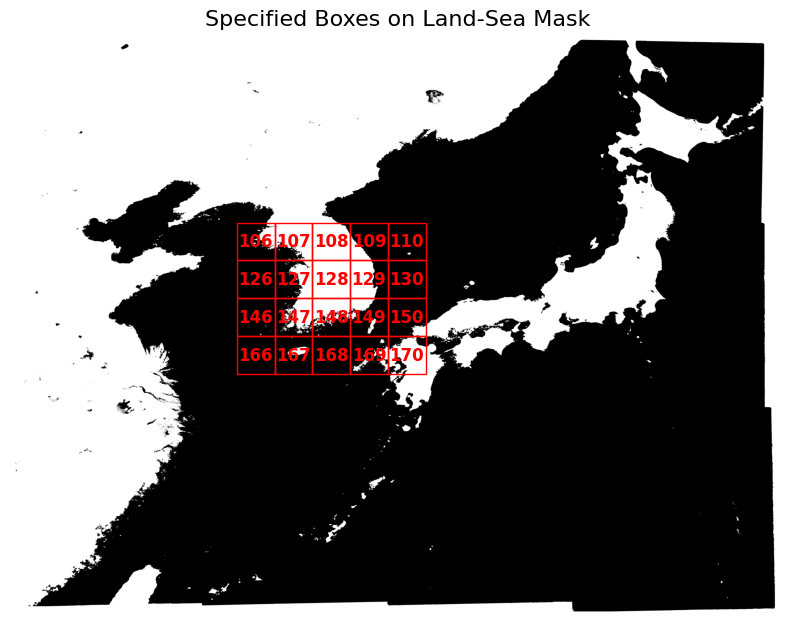


--- Specified Box Coordinates ---
Box 106:
  Top-Left: (3072, 2560)
  Bottom-Right: (3584, 3072)

Box 107:
  Top-Left: (3584, 2560)
  Bottom-Right: (4096, 3072)

Box 108:
  Top-Left: (4096, 2560)
  Bottom-Right: (4608, 3072)

Box 109:
  Top-Left: (4608, 2560)
  Bottom-Right: (5120, 3072)

Box 110:
  Top-Left: (5120, 2560)
  Bottom-Right: (5632, 3072)

Box 126:
  Top-Left: (3072, 3072)
  Bottom-Right: (3584, 3584)

Box 127:
  Top-Left: (3584, 3072)
  Bottom-Right: (4096, 3584)

Box 128:
  Top-Left: (4096, 3072)
  Bottom-Right: (4608, 3584)

Box 129:
  Top-Left: (4608, 3072)
  Bottom-Right: (5120, 3584)

Box 130:
  Top-Left: (5120, 3072)
  Bottom-Right: (5632, 3584)

Box 146:
  Top-Left: (3072, 3584)
  Bottom-Right: (3584, 4096)

Box 147:
  Top-Left: (3584, 3584)
  Bottom-Right: (4096, 4096)

Box 148:
  Top-Left: (4096, 3584)
  Bottom-Right: (4608, 4096)

Box 149:
  Top-Left: (4608, 3584)
  Bottom-Right: (5120, 4096)

Box 150:
  Top-Left: (5120, 3584)
  Bottom-Right: (5632, 4096)

Box 1

FileNotFoundError: [Errno 2] No such file or directory: '106to168_boundary_coordinates_included_UST21.csv'

In [ ]:
import numpy as np
import csv
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from scipy import io
import re
import logging

# Configure logging
logging.basicConfig(
    filename='boundary_processing.log',
    filemode='a',
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

# Load the Land-Sea Mask
try:
    mat_file = io.loadmat('/home/juneyonglee/Desktop/AY_ust/preprocessing/Land_mask/Land_mask.mat')
    mask = mat_file['Land']
    logging.info("Land-Sea mask loaded successfully.")
except Exception as e:
    logging.error(f"Error loading Land-Sea mask: {e}")
    raise

def find_boundary_coordinates(mask, boxes, include_box_indices=None):
    boundary_coords = []

    # Ensure include_box_indices is a set for faster lookup
    if include_box_indices is None:
        include_box_indices = set(range(len(boxes)))  # Include all boxes by default
    else:
        include_box_indices = set(include_box_indices)

    # Traverse through the entire mask array to detect the transition points
    for i in range(1, mask.shape[0] - 1):
        for j in range(1, mask.shape[1] - 1):
            # Check if the current pixel is different from its right neighbor or bottom neighbor
            if mask[i, j] != mask[i, j + 1] or mask[i, j] != mask[i + 1, j]:
                # Check if the coordinate is inside any of the included boxes
                for idx, box in enumerate(boxes):
                    if idx in include_box_indices:
                        if box['x'] <= j <= box['x'] + box['size'] and box['y'] <= i <= box['y'] + box['size']:
                            boundary_coords.append((i, j))  # Collect included coordinates
                            break

    return boundary_coords

def create_boxes(height, width, box_size=512):
    boxes = []
    for i in range(height // box_size):
        for j in range(width // box_size):
            box = {
                'x': j * box_size,
                'y': i * box_size,
                'size': box_size
            }
            boxes.append(box)
    return boxes

def process_mask_with_specific_boxes(mask, box_size, include_box_indices):
    # Create the boxes based on the current box size
    height, width = mask.shape[:2]
    boxes = create_boxes(height, width, box_size=box_size)
    logging.info(f"Created {len(boxes)} boxes with size {box_size}x{box_size}.")

    # Plot the boxes on the mask
    plt.figure(figsize=(10, 8), dpi=100)  # Adjust figsize and dpi for better handling
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(mask, cmap='gray')
    logging.info("Mask image displayed for plotting boxes.")

    # Draw the boxes and their indices
    for idx, box in enumerate(boxes):
        if idx in include_box_indices:
            rect = patches.Rectangle((box['x'], box['y']), box['size'], box['size'], linewidth=1, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            # Draw the index number inside the box
            ax.text(box['x'] + box['size'] / 2, box['y'] + box['size'] / 2, str(idx),
                    color='red', ha='center', va='center', fontsize=12, weight='bold')

    plt.axis('off')
    plt.title('Specified Boxes on Land-Sea Mask', fontsize=16)
    plt.show()
    logging.info("Boxes plotted on the mask image.")

    # Print the top-left and bottom-right coordinates for each specified box
    print("\n--- Specified Box Coordinates ---")
    for idx in include_box_indices:
        if idx < len(boxes):
            box = boxes[idx]
            top_left = (box['x'], box['y'])
            bottom_right = (box['x'] + box['size'], box['y'] + box['size'])
            print(f"Box {idx}:")
            print(f"  Top-Left: {top_left}")
            print(f"  Bottom-Right: {bottom_right}\n")
            logging.info(f"Box {idx} coordinates - Top-Left: {top_left}, Bottom-Right: {bottom_right}.")
        else:
            print(f"Box index {idx} is out of range.\n")
            logging.warning(f"Box index {idx} is out of range.")

    # Get the boundary coordinates within the specified boxes
    boundary_coordinates = find_boundary_coordinates(mask, boxes, include_box_indices=include_box_indices)
    logging.info(f"Found {len(boundary_coordinates)} boundary coordinates in specified boxes.")

    # Display the total number of boundary coordinates found
    print(f"Total boundary coordinates found for specified boxes: {len(boundary_coordinates)}")
    logging.info(f"Total boundary coordinates found for specified boxes: {len(boundary_coordinates)}")

    # Print a few boundary coordinates for verification
    if boundary_coordinates:
        print("Sample boundary coordinates:", boundary_coordinates[:10])
        logging.info(f"Sample boundary coordinates: {boundary_coordinates[:10]}")
    else:
        print("No boundary coordinates found in the specified boxes.")
        logging.info("No boundary coordinates found in the specified boxes.")

    # Save the boundary coordinates to a single CSV file
    output_file_included = 'specific_boundary_coordinates_included_UST21.csv'

    try:
        with open(output_file_included, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            # Write the header
            csvwriter.writerow(['Y Coordinate', 'X Coordinate'])
            # Write the included coordinates
            csvwriter.writerows(boundary_coordinates)
        print(f"Included boundary coordinates saved to {output_file_included}")
        logging.info(f"Included boundary coordinates saved to {output_file_included}")
    except Exception as e:
        print(f"Error saving boundary coordinates to CSV: {e}")
        logging.error(f"Error saving boundary coordinates to CSV: {e}")

def plot_boundary_boxes(mask, boundary_coords, box_size=5):
    """
    Plots the boundary coordinates on the mask using scatter plot for better visibility.

    Parameters:
    - mask (numpy.ndarray): 2D mask array.
    - boundary_coords (list of tuples): List of (y, x) coordinates.
    - box_size (int): Size of the box to draw around each boundary coordinate (not used in scatter).
    """
    height, width = mask.shape[:2]
    plt.figure(figsize=(10, 8), dpi=100)  # Adjust figsize and dpi as needed
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(mask, cmap='gray')
    logging.info("Mask image displayed for plotting boundary coordinates.")

    if boundary_coords:
        # Extract y and x coordinates
        y_coords, x_coords = zip(*boundary_coords)
        # Plot as scatter with increased marker size for visibility
        ax.scatter(x_coords, y_coords, c='red', s=1, marker='o', alpha=0.6, label='Boundary Coordinates')
        logging.info(f"Plotted {len(boundary_coords)} boundary points as scatter.")
        print(f"Plotted {len(boundary_coords)} boundary points.")
    else:
        print("No boundary coordinates to plot.")
        logging.info("No boundary coordinates to plot.")

    plt.axis('off')
    plt.title('Boundary Coordinates on Land-Sea Mask', fontsize=16)
    plt.legend(loc='upper right')
    plt.show()
    logging.info("Boundary coordinates plotted on the mask image.")

def load_boundary_coordinates_from_csv(filename):
    boundary_coords = []
    try:
        with open(filename, 'r') as csvfile:
            csvreader = csv.reader(csvfile)
            next(csvreader)  # Skip the header
            for row in csvreader:
                y, x = int(row[0]), int(row[1])
                boundary_coords.append((y, x))
        logging.info(f"Loaded boundary coordinates from {filename}")
    except FileNotFoundError:
        logging.error(f"CSV file '{filename}' not found.")
        raise
    except Exception as e:
        print(f"Error loading boundary coordinates from CSV: {e}")
        logging.error(f"Error loading boundary coordinates from CSV: {e}")
        raise
    return boundary_coords


# Process the mask with specific box indices
box_size = 512
include_box_indices = [106,107,108,109,110,126,127,128,129,130,146,147,148,149,150,166,167,168,169,170]  # Example: Only process these specific boxes
# include_box_indices = [146,147,148,149]  # Example: Only process these specific boxes

process_mask_with_specific_boxes(mask, box_size, include_box_indices)

# Load included boundary coordinates from the CSV file
boundary_coordinates_included = load_boundary_coordinates_from_csv('106to168_boundary_coordinates_included_UST21.csv')

# Plot the included boundary boxes on the mask
plot_boundary_boxes(mask, boundary_coordinates_included)


#### 원하는 박스 번호에 대해서 좌표 얻기 (GOCI한반도)

<Figure size 1000x800 with 0 Axes>

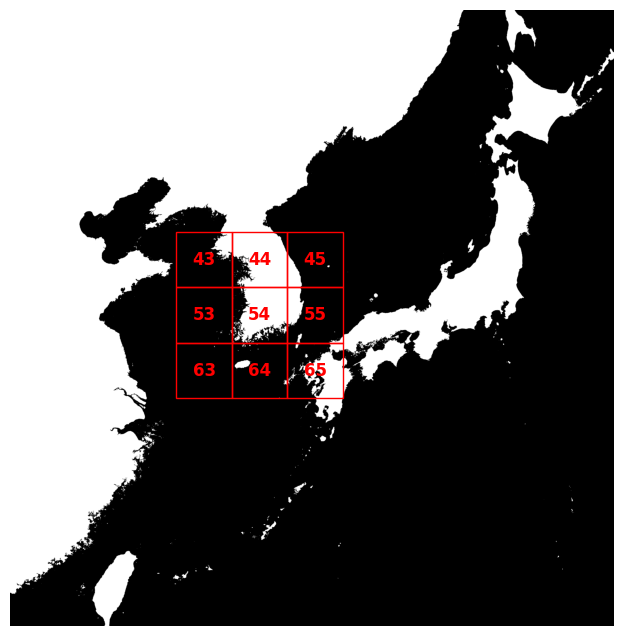


--- Specified Box Coordinates ---
Box 43:
  Top-Left: (1536, 2048)
  Bottom-Right: (2048, 2560)

Box 44:
  Top-Left: (2048, 2048)
  Bottom-Right: (2560, 2560)

Box 45:
  Top-Left: (2560, 2048)
  Bottom-Right: (3072, 2560)

Box 53:
  Top-Left: (1536, 2560)
  Bottom-Right: (2048, 3072)

Box 54:
  Top-Left: (2048, 2560)
  Bottom-Right: (2560, 3072)

Box 55:
  Top-Left: (2560, 2560)
  Bottom-Right: (3072, 3072)

Box 63:
  Top-Left: (1536, 3072)
  Bottom-Right: (2048, 3584)

Box 64:
  Top-Left: (2048, 3072)
  Bottom-Right: (2560, 3584)

Box 65:
  Top-Left: (2560, 3072)
  Bottom-Right: (3072, 3584)

Total boundary coordinates found for specified boxes: 25257
Sample boundary coordinates: [(2048, 1942), (2048, 2429), (2049, 1942), (2049, 2429), (2049, 2430), (2049, 2431), (2050, 1942), (2050, 2431), (2051, 1942), (2051, 2431)]
Included boundary coordinates saved to 53to55_boundary_coordinates_included_GOCI.csv
Plotted 25257 boundary points.


<Figure size 1000x800 with 0 Axes>

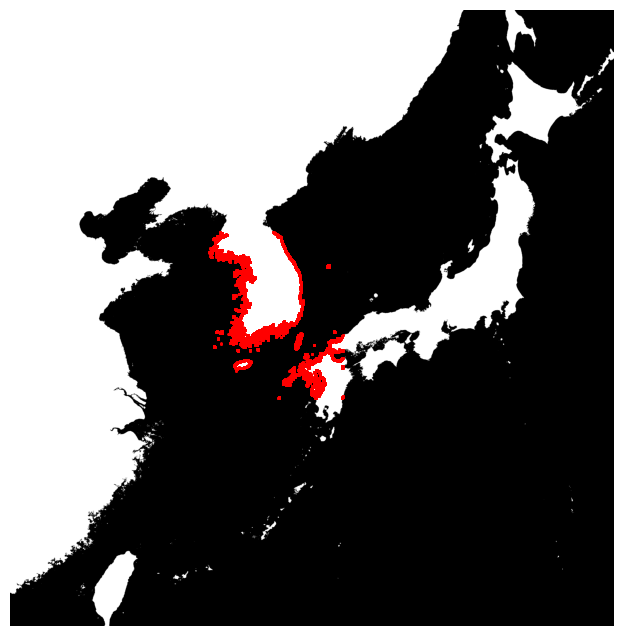

In [ ]:
import numpy as np
import csv
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from scipy import io
import re
import logging
from skimage.transform import resize
import os

# Configure logging
logging.basicConfig(
    filename='boundary_processing.log',
    filemode='a',
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

# Load the Land-Sea Mask
try:
    # Change the path to your actual .npy file
    mask = np.load('/home/juneyonglee/Desktop/AY_ust/preprocessing/is_land_on_GOCI_modified_1_999.npy')
    logging.info("Land-Sea mask loaded successfully.")
except Exception as e:
    logging.error(f"Error loading Land-Sea mask: {e}")
    raise

def find_boundary_coordinates(mask, boxes, include_box_indices=None):
    boundary_coords = []

    # Ensure include_box_indices is a set for faster lookup
    if include_box_indices is None:
        include_box_indices = set(range(len(boxes)))  # Include all boxes by default
    else:
        include_box_indices = set(include_box_indices)

    # Traverse through the entire mask array to detect the transition points
    for i in range(1, mask.shape[0] - 1):
        for j in range(1, mask.shape[1] - 1):
            # Check if the current pixel is different from its right neighbor or bottom neighbor
            if mask[i, j] != mask[i, j + 1] or mask[i, j] != mask[i + 1, j]:
                # Check if the coordinate is inside any of the included boxes
                for idx, box in enumerate(boxes):
                    if idx in include_box_indices:
                        if (box['x'] <= j < box['x'] + box['size']) and (box['y'] <= i < box['y'] + box['size']):
                            boundary_coords.append((i, j))  # Collect included coordinates
                            break

    return boundary_coords

def create_boxes(height, width, box_size=512):
    boxes = []
    num_boxes_y = height // box_size
    num_boxes_x = width // box_size
    for i in range(num_boxes_y):
        for j in range(num_boxes_x):
            box = {
                'x': j * box_size,
                'y': i * box_size,
                'size': box_size
            }
            boxes.append(box)
    return boxes

def process_mask_with_specific_boxes(mask, box_size, include_box_indices):
    # Create the boxes based on the current box size
    height, width = mask.shape[:2]
    boxes = create_boxes(height, width, box_size=box_size)

    # Plot the boxes on the mask
    plt.figure(figsize=(10, 8), dpi=100)  # Reduced figsize and dpi for better handling
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(mask, cmap='gray')

    # Draw the boxes and their indices
    for idx, box in enumerate(boxes):
        if idx in include_box_indices:
            rect = patches.Rectangle((box['x'], box['y']), box['size'], box['size'], linewidth=1, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            # Draw the index number inside the box
            ax.text(box['x'] + box['size'] / 2, box['y'] + box['size'] / 2, str(idx),
                    color='red', ha='center', va='center', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()

    # Print the top-left and bottom-right coordinates for each specified box
    print("\n--- Specified Box Coordinates ---")
    for idx in include_box_indices:
        if idx < len(boxes):
            box = boxes[idx]
            top_left = (box['x'], box['y'])
            bottom_right = (box['x'] + box['size'], box['y'] + box['size'])
            print(f"Box {idx}:")
            print(f"  Top-Left: {top_left}")
            print(f"  Bottom-Right: {bottom_right}\n")
        else:
            print(f"Box index {idx} is out of range.\n")
            logging.warning(f"Box index {idx} is out of range.")

    # Get the boundary coordinates within the specified boxes
    boundary_coordinates = find_boundary_coordinates(mask, boxes, include_box_indices=include_box_indices)

    # Display the total number of boundary coordinates found
    print(f"Total boundary coordinates found for specified boxes: {len(boundary_coordinates)}")
    logging.info(f"Total boundary coordinates found for specified boxes: {len(boundary_coordinates)}")

    # Print a few boundary coordinates for verification
    if boundary_coordinates:
        print("Sample boundary coordinates:", boundary_coordinates[:10])
        logging.info(f"Sample boundary coordinates: {boundary_coordinates[:10]}")
    else:
        print("No boundary coordinates found in the specified boxes.")
        logging.info("No boundary coordinates found in the specified boxes.")

    # Save the boundary coordinates to a single CSV file
    output_file_included = '53to55_boundary_coordinates_included_GOCI.csv'

    try:
        with open(output_file_included, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            # Write the header
            csvwriter.writerow(['Y Coordinate', 'X Coordinate'])
            # Write the included coordinates
            csvwriter.writerows(boundary_coordinates)
        print(f"Included boundary coordinates saved to {output_file_included}")
        logging.info(f"Included boundary coordinates saved to {output_file_included}")
    except Exception as e:
        print(f"Error saving boundary coordinates to CSV: {e}")
        logging.error(f"Error saving boundary coordinates to CSV: {e}")

def plot_boundary_boxes(mask, boundary_coords, box_size=5):
    """
    Plots the boundary coordinates on the mask.

    Parameters:
    - mask (numpy.ndarray): 2D mask array.
    - boundary_coords (list of tuples): List of (y, x) coordinates.
    - box_size (int): Size of the box to draw around each boundary coordinate.
    """
    height, width = mask.shape[:2]
    plt.figure(figsize=(10, 8), dpi=100)  # Adjust figsize and dpi as needed
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(mask, cmap='gray')

    if boundary_coords:
        # Extract y and x coordinates
        y_coords, x_coords = zip(*boundary_coords)
        # Plot as scatter
        ax.scatter(x_coords, y_coords, c='red', s=1, marker='o')  # s is the marker size
        print(f"Plotted {len(boundary_coords)} boundary points.")
        logging.info(f"Plotted {len(boundary_coords)} boundary points.")
    else:
        print("No boundary coordinates to plot.")
        logging.info("No boundary coordinates to plot.")

    plt.axis('off')
    plt.show()

def load_boundary_coordinates_from_csv(filename):
    boundary_coords = []
    try:
        with open(filename, 'r') as csvfile:
            csvreader = csv.reader(csvfile)
            next(csvreader)  # Skip the header
            for row in csvreader:
                y, x = int(row[0]), int(row[1])
                boundary_coords.append((y, x))
        logging.info(f"Loaded boundary coordinates from {filename}")
    except Exception as e:
        print(f"Error loading boundary coordinates from CSV: {e}")
        logging.error(f"Error loading boundary coordinates from CSV: {e}")
        raise
    return boundary_coords

# Process the mask with specific box indices
box_size = 512
include_box_indices = [43,44,45,53,54,55,63,64,65]  # Example: Only process these specific boxes
# include_box_indices = [53, 54, 55]  # Example: Only process these specific boxes
process_mask_with_specific_boxes(mask, box_size, include_box_indices)

# Load included boundary coordinates from the CSV file
boundary_coordinates_included = load_boundary_coordinates_from_csv('53to55_boundary_coordinates_included_GOCI.csv')

# Plot the included boundary coordinates on the mask
plot_boundary_boxes(mask, boundary_coordinates_included, box_size=5)




In [ ]:
import cv2
import numpy as np

# 확인할 마스크 파일 경로
mask_path = "/media/juneyonglee/My Book1/Preprocessed/GOCI_RRS/mask/band2/test/50/20150916_r2075_c2719.png"

# 그레이스케일로 읽어 들이기
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

if mask is None:
    print(f"파일을 읽을 수 없습니다: {mask_path}")
else:
    # 유일한 값, 데이터 타입, 크기 출력
    unique_vals = np.unique(mask)
    print("Unique values in mask:", unique_vals)
    print("Mask dtype:", mask.dtype)
    print("Mask shape:", mask.shape)


Unique values in mask: [  0 255]
Mask dtype: uint8
Mask shape: (256, 256)
